In [1]:
library('palmerpenguins')

In [2]:
#Is this a local file or a global library?

In [3]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
?filter

filter {stats},R Documentation
x,a univariate or multivariate time series.
filter,a vector of filter coefficients in reverse time order (as for AR or MA coefficients).
method,"Either ""convolution"" or ""recursive"" (and can be abbreviated). If ""convolution"" a moving average is used: if ""recursive"" an autoregression is used."
sides,"for convolution filters only. If sides = 1 the filter coefficients are for past values only; if sides = 2 they are centred around lag 0. In this case the length of the filter should be odd, but if it is even, more of the filter is forward in time than backward."
circular,"for convolution filters only. If TRUE, wrap the filter around the ends of the series, otherwise assume external values are missing (NA)."
init,"for recursive filters only. Specifies the initial values of the time series just prior to the start value, in reverse time order. The default is a set of zeros."


In [5]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [6]:
#This takes the penguins dataset and sends it into the function 'head' or header

In [7]:
penguins |> dim()

[1] 344   8

In [8]:
#We're programming in a style called piping right now- with this code, the equivalent could be achieved by using:

In [9]:
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [10]:
penguins |>
    group_by(species) |>
    summarize(n=n())

species,n
<fct>,<int>
Adelie,152
Chinstrap,68
Gentoo,124


In [11]:
#piping is useful for organization later

In [12]:
penguins %>%
group_by(species) %>%
summarize(n=n())

species,n
<fct>,<int>
Adelie,152
Chinstrap,68
Gentoo,124


In [13]:
#Both %>% and |> work for piping

In [14]:
# |> is generally preferred right now

In [15]:
p = ggplot(penguins, aes(y=species)) +geom_bar()

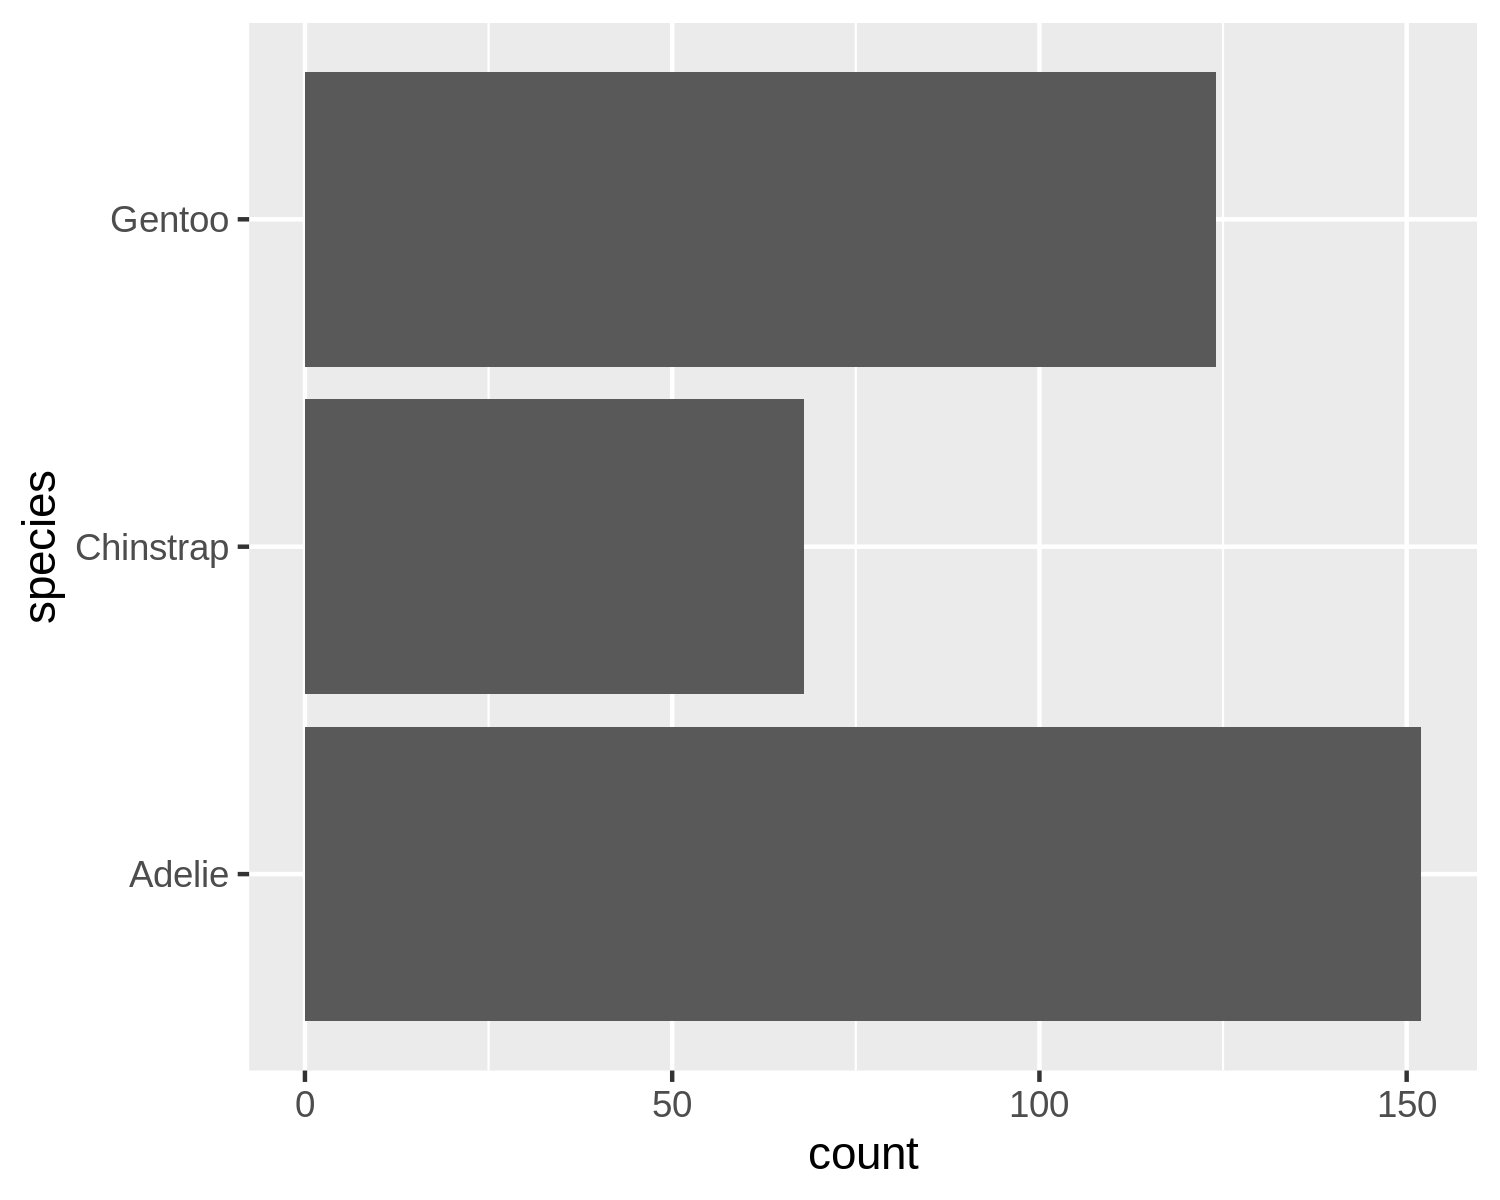

In [16]:
p

In [17]:
?ggplot

ggplot {ggplot2},R Documentation
data,"Default dataset to use for plot. If not already a data.frame, will be converted to one by fortify(). If not specified, must be supplied in each layer added to the plot."
mapping,"Default list of aesthetic mappings to use for plot. If not specified, must be supplied in each layer added to the plot."
...,Other arguments passed on to methods. Not currently used.
environment,Used prior to tidy evaluation.


In [18]:
#Are there differences in body mass between male and female penguins?

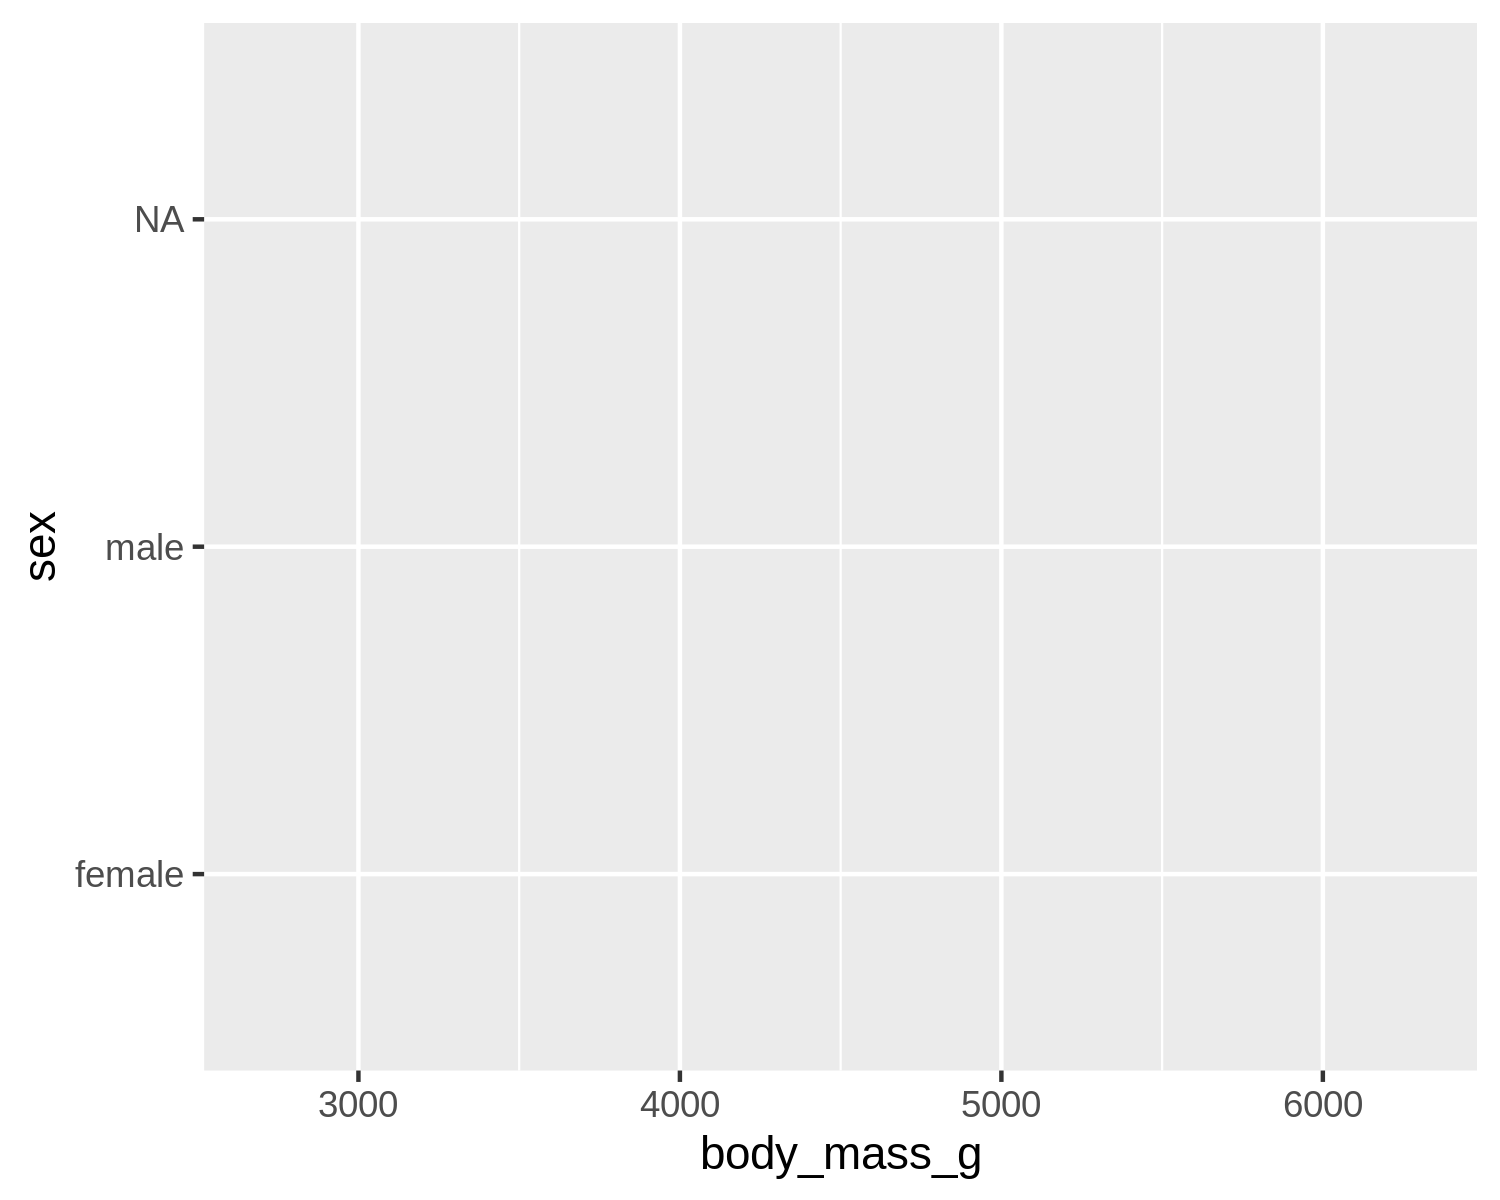

In [19]:
p2 = ggplot(penguins, aes(x= body_mass_g, y= sex))
p2

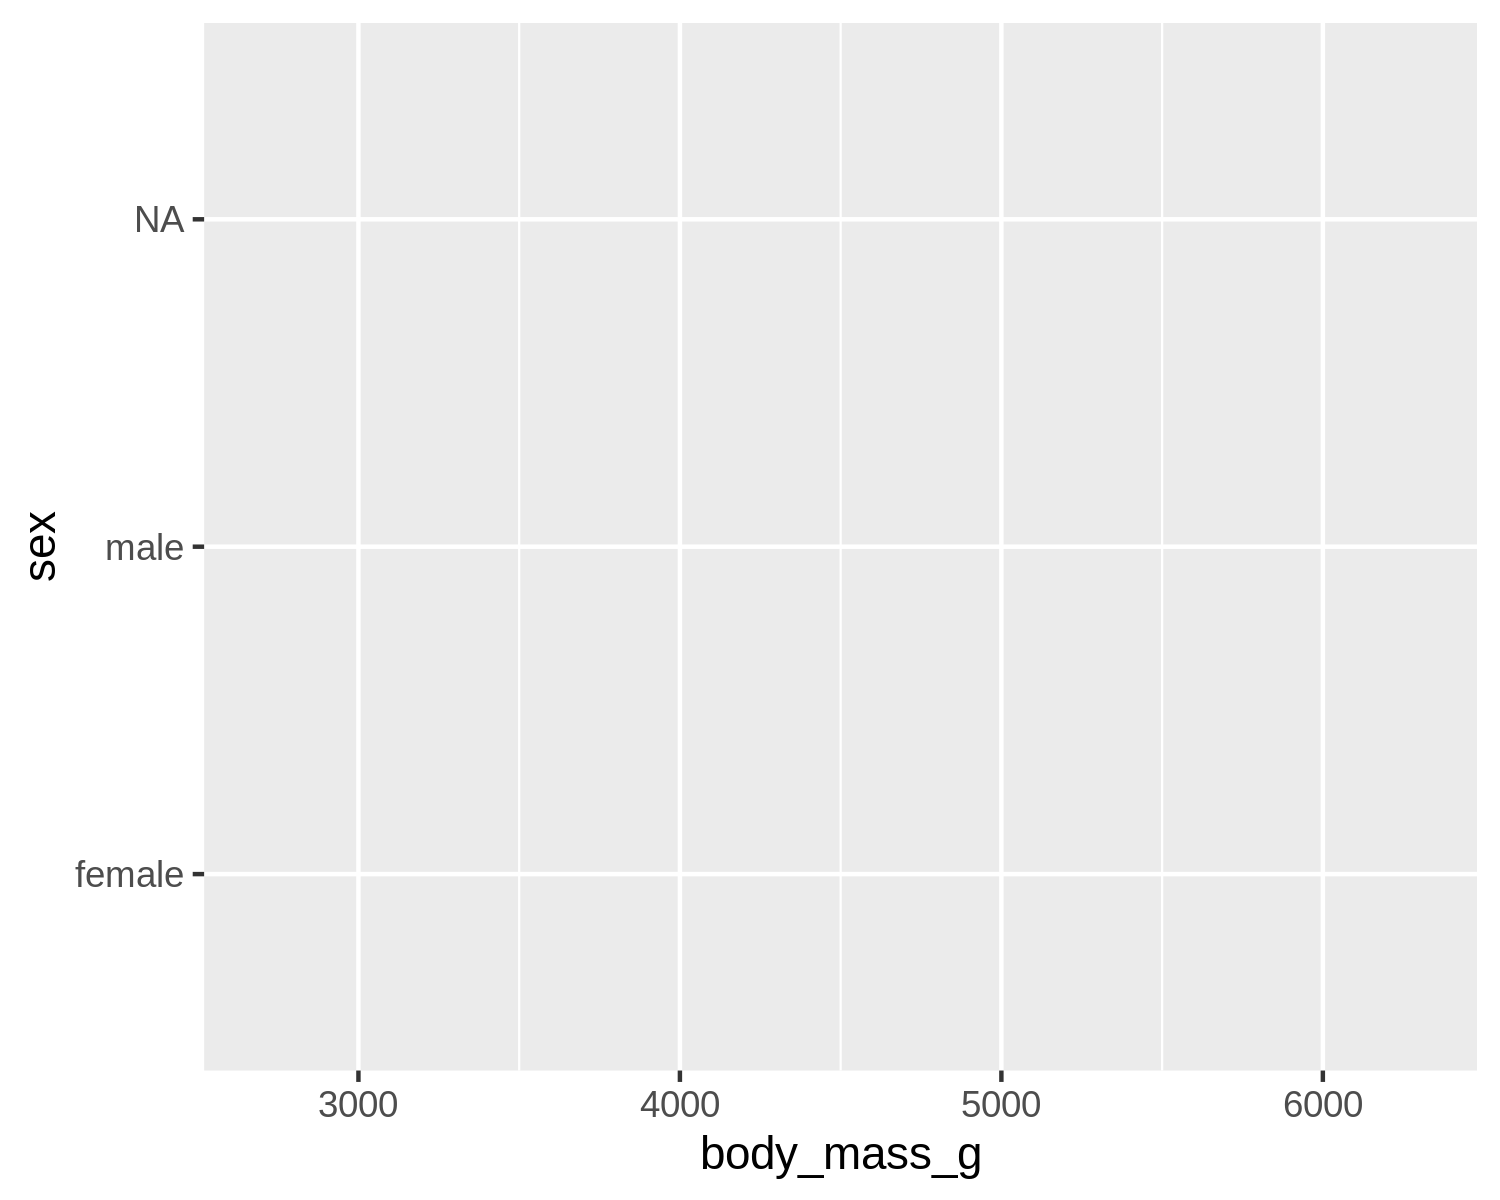

In [19]:
p2 = ggplot(penguins, aes(x= body_mass_g, y= sex))
p2

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


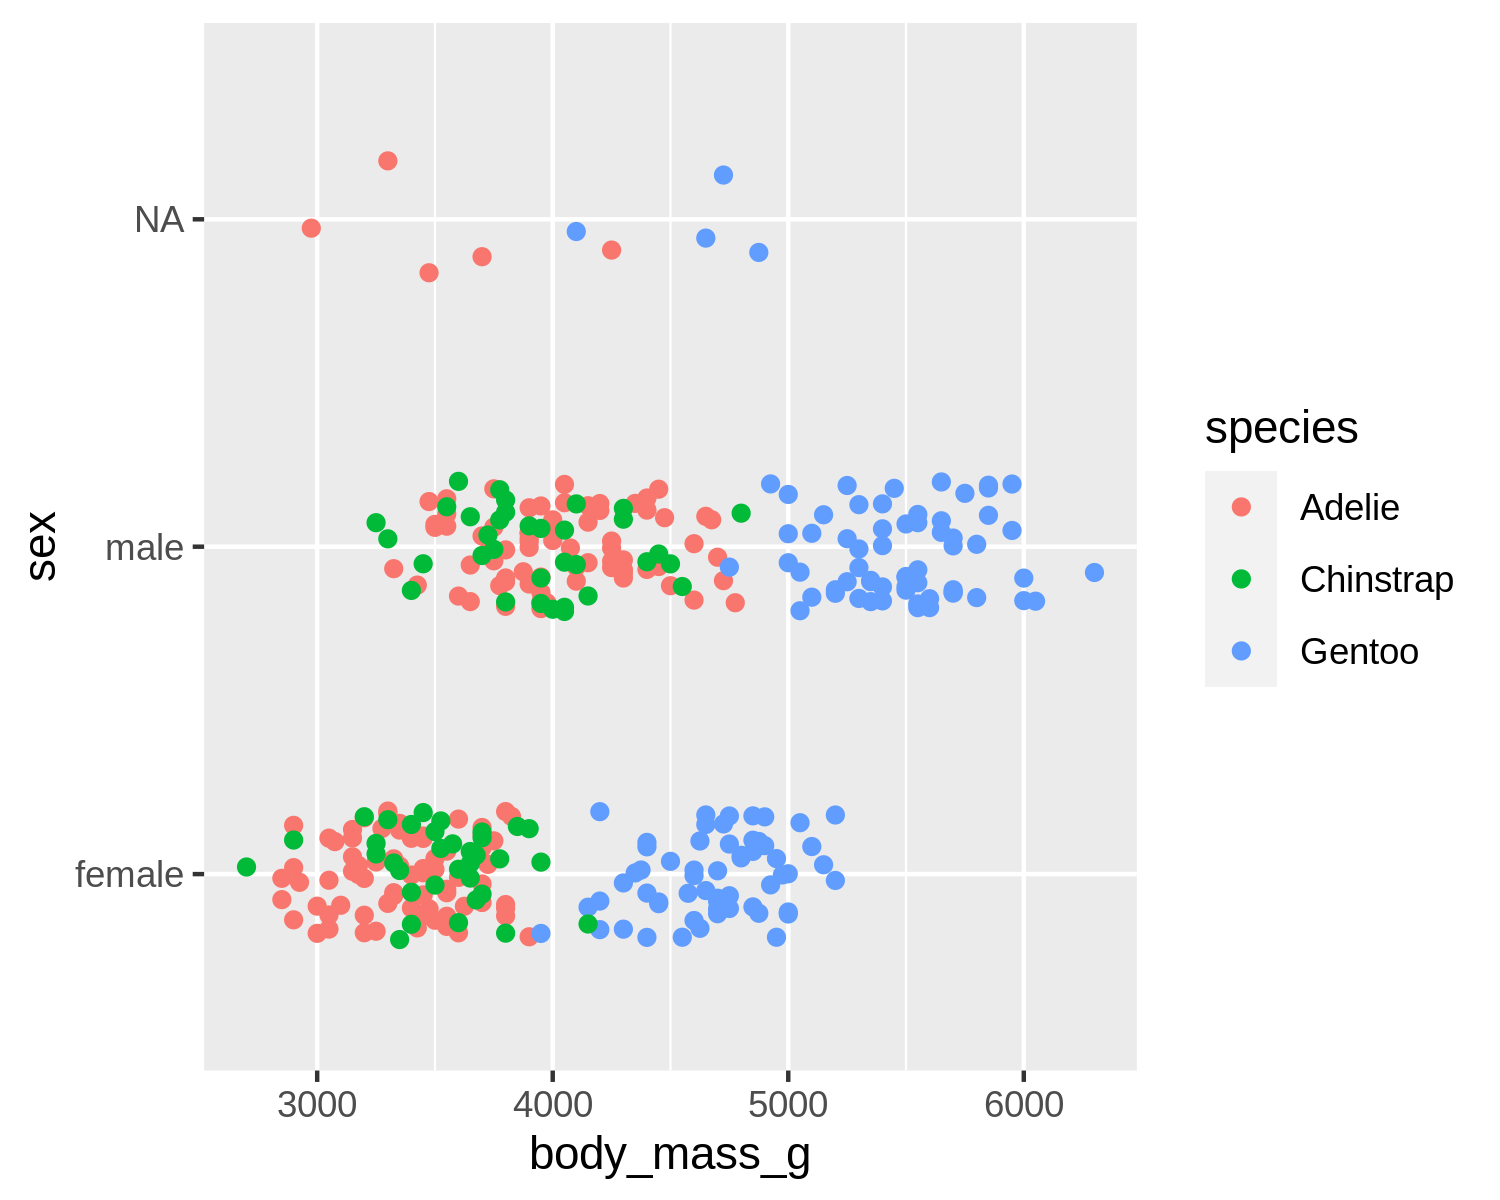

In [22]:
p2 = ggplot(penguins, aes(x = body_mass_g, y= sex, color = species)) + 
    geom_point(position = position_jitter(height = 0.2, width = 0))
p2

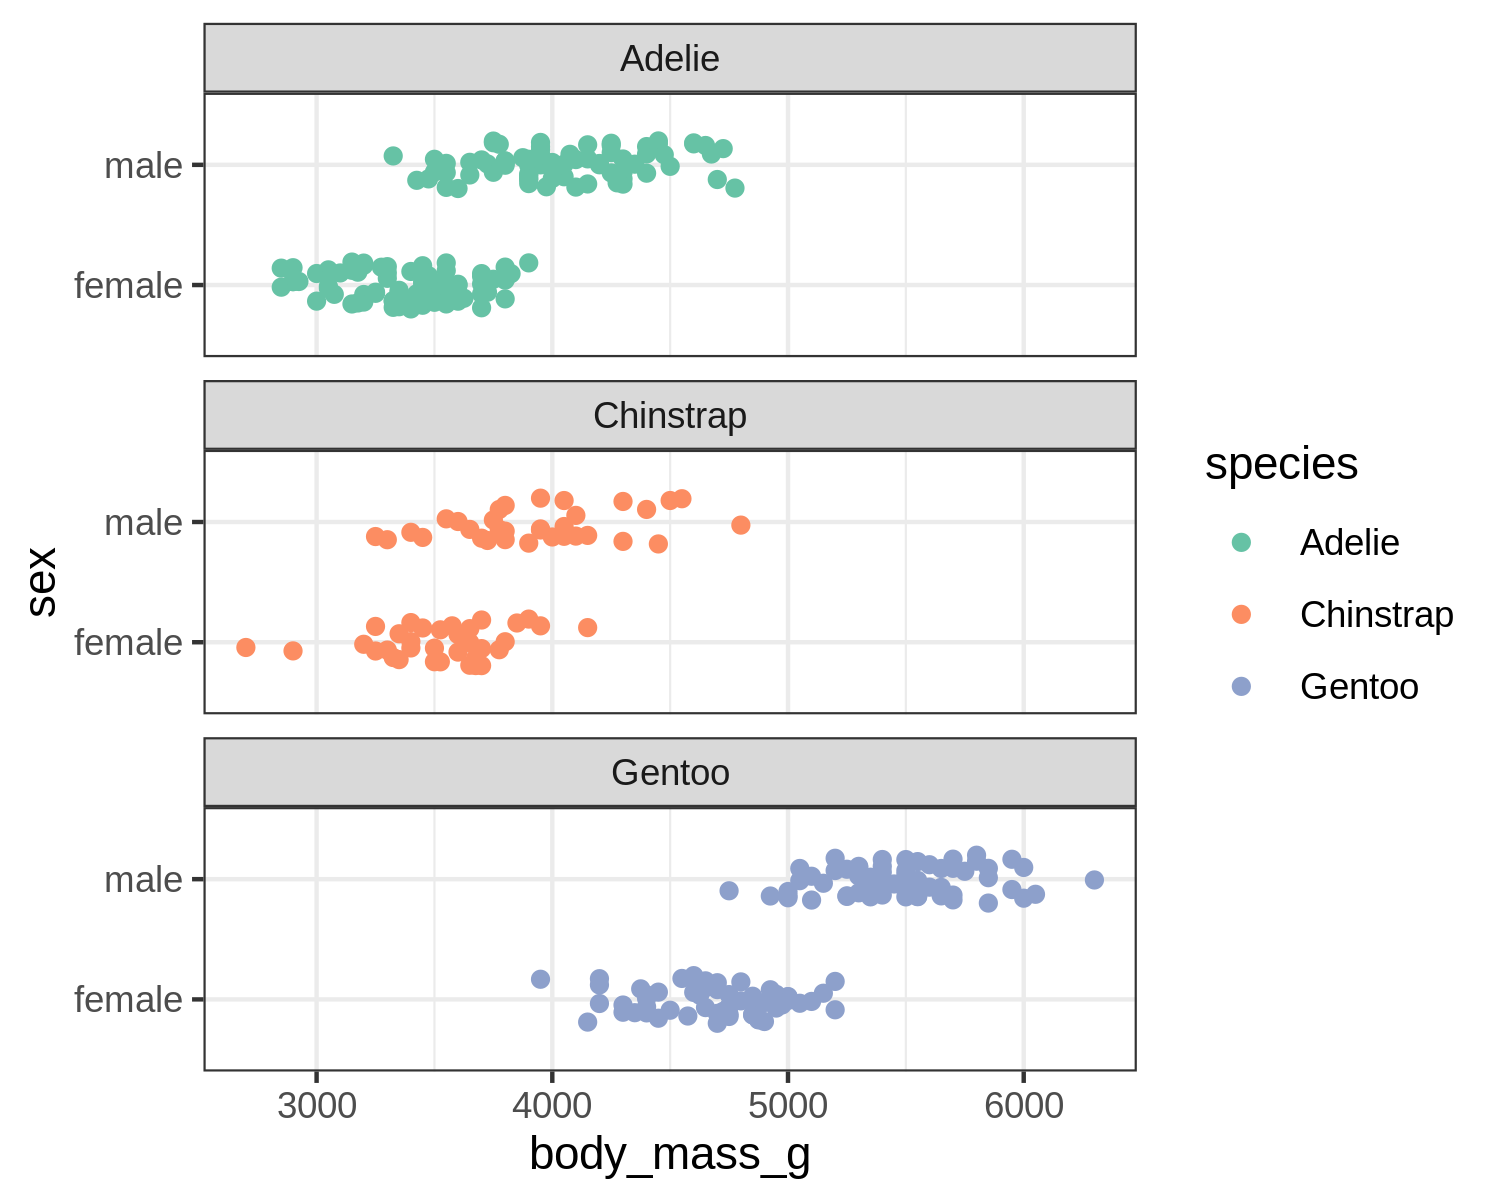

In [24]:
p2 = ggplot(penguins |> drop_na(), aes(x = body_mass_g, y= sex, color = species)) + 
    geom_point(position = position_jitter(height = 0.2, width = 0)) +
    facet_wrap(~species, ncol = 1) +
    scale_color_brewer(palette = 'Set2') +
    theme_bw()
p2